# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load dataset

In [2]:
data = pd.read_csv('../datasets/train.txt', sep='\t', header=None, names=['Title', 'Origin', 'Genre', 'Director', 'Plot'])

print("Genre value counts")
print(data['Genre'].value_counts())

Genre value counts

Genre

drama        1676

comedy       1193

horror       1108

action       1059

romance       886

western       829

crime         541

animation     535

sci-fi        214

Name: count, dtype: int64


In [3]:
data.head()

,Title,Origin,Genre,Director,Plot
0,Ela Cheppanu,Telugu,romance,Ramana,Sekhar (Tarun) is a graduate from IIM and work...
1,A Nightmare on Elm Street,American,horror,Samuel Bayer,Kris Fowles (Katie Cassidy) goes to the Spring...
2,American Gothic,American,horror,John Hough,Cynthia is traumatized by the death of her bab...
3,Gang,Bollywood,crime,Mazhar Khan,"Four friends, Gangu (Jackie Shroff), Abdul (Na..."
4,Intimate Relations,British,drama,Charles Frank,Crisis in a middle-class family when the son f...


## Stop Words + Preprocessing

In [4]:
stop_words = ["the", "to", "of", "a", 'and', 'is', 'his', 'in', 'he', 
            'that', 'her', "with", "by", "for", "him", "the", "as", "who",
            "on", "she", "but", "from", "has", "they", "an", "at", "their", "are",
            "into", "he", "out", "it", "up", "be", "was", "when", "not", "them", "which",
            "then", "after", "about", "where", "one", "have", "When", "After", "tells", "him.",
            "back", "She", "will", "while", "all", "two", "In", "had", "been", "They",
            "get", "only", "also", "before", "off", "being", "As", "goes", "takes",
            "this", "other", "take", "tries", "A", "her.", "go", "gets", "can", "man", "so",
            "over", "through", "down", "help", "new", "him,", "now", "comes", "next", "himself",
            "later", "however", "away", "there", "during", "both", "first", "again", "no", "way", "own",
            "some", "another", "more", "becomes", "make", "does", "what", "begins", "meanwhile", "just",
            "asks", "if", "because", "soon", "having", "its", "eventually", "come", "still", "between", "father",
            "house", "finds"
            ]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.strip(' ')
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

data['Clean_Plot'] = data['Plot'].apply(preprocess_text)

<>:27: SyntaxWarning: invalid escape sequence '\s'

<>:27: SyntaxWarning: invalid escape sequence '\s'

/tmp/ipykernel_15505/1285755728.py:27: SyntaxWarning: invalid escape sequence '\s'

  text = re.sub('\s+', ' ', text)


# Encoding and split

In [5]:
X = data['Clean_Plot'].values
y = data['Genre'].values 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Count Vectorizer

In [6]:
# Bad results with Count Vectorizer, just meant to test
count_vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

## Model + Results

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_counts, y_train)
y_pred = svm_classifier.predict(X_test_counts)

## Results

Accuracy: 0.5954008701056557

Classification Report:

               precision    recall  f1-score   support



           0       0.61      0.53      0.57       202

           1       0.71      0.63      0.66       115

           2       0.43      0.51      0.47       223

           3       0.53      0.41      0.46       108

           4       0.47      0.64      0.54       319

           5       0.80      0.69      0.74       223

           6       0.62      0.52      0.56       186

           7       0.52      0.38      0.44        39

           8       0.89      0.78      0.84       194



    accuracy                           0.60      1609

   macro avg       0.62      0.57      0.59      1609

weighted avg       0.62      0.60      0.60      1609



Confusion Matrix:




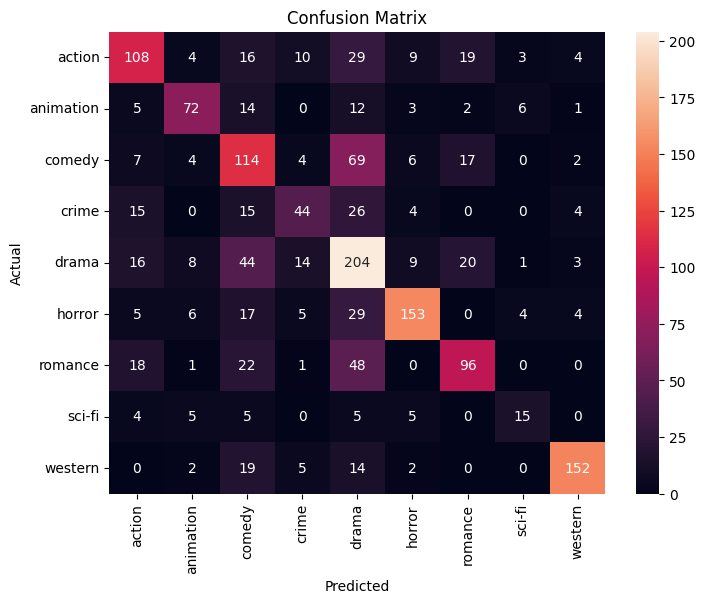

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# 0.54 accuracy with a strange confusion matrix

# GloVe for feature extraction

## Import GloVe

In [9]:
import numpy as np
glove_file = '../glove.6B/glove.6B.100d.txt'

def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            embedding_vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = embedding_vector
    return embeddings_index

embeddings_index = load_glove_embeddings(glove_file)
print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 400000 word vectors.


In [10]:
import numpy as np

def get_average_embedding(text, embeddings_index, embedding_dim=100):
    words = text.split()  # very basic tokenization
    embedding_matrix = []
    
    for word in words:
        if word in embeddings_index:
            embedding_matrix.append(embeddings_index[word])
        else:
            embedding_matrix.append(np.zeros(embedding_dim))  # uses a zero vector for unknown words
    
    if len(embedding_matrix) > 0:
        # we calculate the average embeddings
        return np.mean(embedding_matrix, axis=0)
    else:
        return np.zeros(embedding_dim)  # returns zero vector if no embeddings found

X = data['Clean_Plot'].values
embedding_dim = 100 # because we're using the 100-dim GloVe vectors
X_embeddings = np.array([get_average_embedding(plot, embeddings_index, embedding_dim) for plot in X])
print(X_embeddings.shape, embedding_dim, X_embeddings.shape[1])

(8041, 100) 100 100


## Give it to SVC (SVC with GloVe embeddings)

Accuracy: 0.6196395276569298

Classification Report:

               precision    recall  f1-score   support



           0       0.52      0.59      0.55       202

           1       0.78      0.77      0.77       115

           2       0.52      0.51      0.51       223

           3       0.64      0.44      0.52       108

           4       0.48      0.59      0.53       319

           5       0.77      0.79      0.78       223

           6       0.61      0.49      0.54       186

           7       0.68      0.38      0.49        39

           8       0.84      0.82      0.83       194



    accuracy                           0.62      1609

   macro avg       0.65      0.60      0.62      1609

weighted avg       0.63      0.62      0.62      1609



Confusion Matrix:




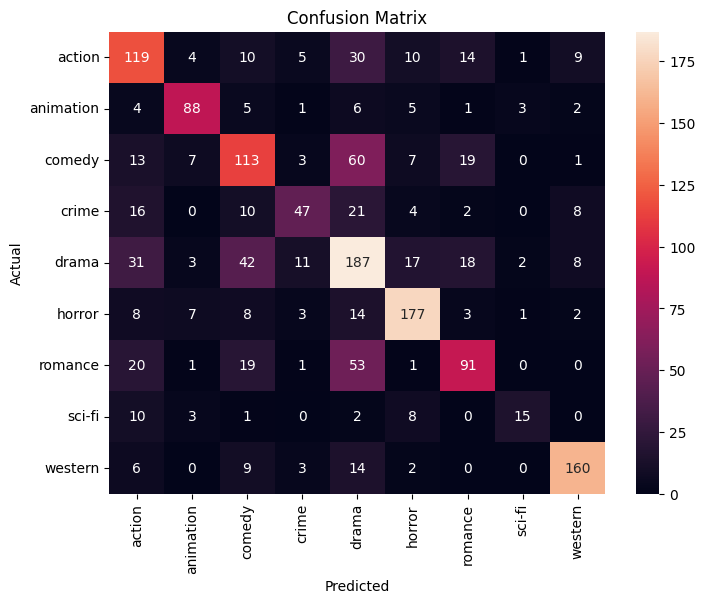

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

y = label_encoder.fit_transform(data['Genre'])
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# 0.62 accuracy, better confusion matrix but still not very good

## Now, we test tf-idf to calculate embeddings

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_text, X_test_text, y_train, y_test = train_test_split(data['Clean_Plot'], y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(min_df=20, stop_words=stop_words, ngram_range=(1, 3))

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

## And we test the embeddings with the SVC model

Accuracy: 0.6482287134866377

Classification Report:

               precision    recall  f1-score   support



           0       0.60      0.65      0.62       202

           1       0.87      0.65      0.75       115

           2       0.49      0.54      0.52       223

           3       0.63      0.37      0.47       108

           4       0.50      0.66      0.57       319

           5       0.83      0.83      0.83       223

           6       0.64      0.49      0.55       186

           7       0.65      0.38      0.48        39

           8       0.94      0.90      0.92       194



    accuracy                           0.65      1609

   macro avg       0.68      0.61      0.63      1609

weighted avg       0.66      0.65      0.65      1609




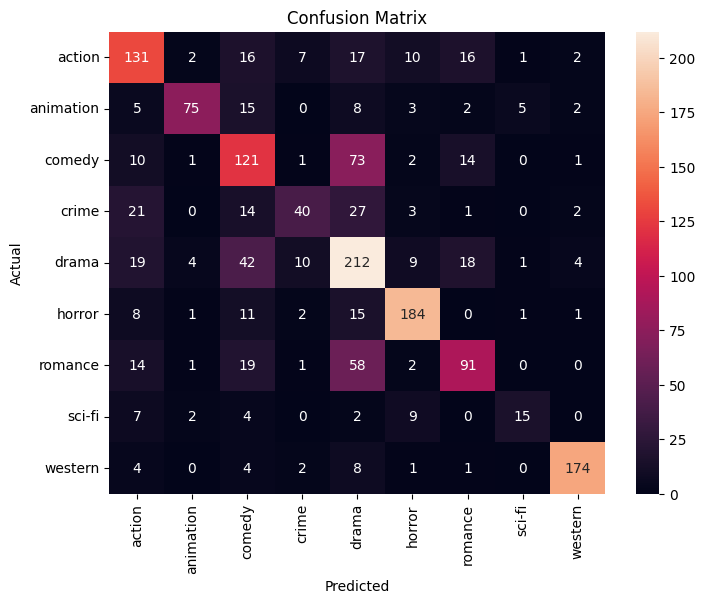

In [13]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 0.648 accuracy is the best so far; the same issues arise with the confusion matrix and the plots, basically 
# grid search and a lot of testing found best parameters are linear kernel and C=1

## Writes the mispredictions to a file

In [14]:
misclassified_indices = np.where(y_pred != y_test)[0]

true_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred)
misclassified_plots = X_test_text.iloc[misclassified_indices]
misclassified_true_labels = true_labels[misclassified_indices]
misclassified_predicted_labels = predicted_labels[misclassified_indices]

with open('mispredictions.txt', 'w', encoding='utf-8') as f:
    for plot, true_label, pred_label in zip(
        misclassified_plots,
        misclassified_true_labels,
        misclassified_predicted_labels
    ):
        f.write(f"Plot: {plot}\n")
        f.write(f"True Label: {true_label}\n")
        f.write(f"Predicted Label: {pred_label}\n")
        f.write("\n")